<center><img src="http://alacip.org/wp-content/uploads/2014/03/logoEscalacip1.png" width="500"></center>


<center> <h1>Curso: Introducción al Python</h1> </center>

<br></br>

* Profesor:  <a href="http://www.pucp.edu.pe/profesor/jose-manuel-magallanes/" target="_blank">Dr. José Manuel Magallanes, PhD</a> ([jmagallanes@pucp.edu.pe](mailto:jmagallanes@pucp.edu.pe))<br>
    - Profesor del **Departamento de Ciencias Sociales, Pontificia Universidad Católica del Peru**.<br>
    - Senior Data Scientist del **eScience Institute** and Visiting Professor at **Evans School of Public Policy and Governance, University of Washington**.<br>
    - Fellow Catalyst, **Berkeley Initiative for Transparency in Social Sciences, UC Berkeley**.


## Parte 6:  Redes sociales en Python

Plan for this session:
1. [Importing Data and Building a Network](#part1) 
2. [Exploring Network, agents and groups](#part2) 
3. [Exporting the Network](#part3) 

<a id='part1'></a>
## 1. Importing Data

You need to be aware of the format your data has when you need to import it. If you have files already formatted as a network this step is less important. But if you are receiving file from where you need to create the network, the job can be difficult if you are not aware of some simple details shared below.

1.1 **Importing Edges List:**

An *edge list* is a common way to gather information on a network, its format is shown below:

<img src="pics/edgelist.png" width="200">

This data is about cosponsorship. The data is connecting legislators that presented a bill together. 

We will use Pandas to get the data:

In [1]:
#name and location of file:
fileEdges='https://github.com/escuela-alacip/introPython/raw/master/data/cosponsorshipEdges.csv'

# This reads the CSV file. Not a network yet.
import pandas
EdgesAsDF=pandas.read_csv(fileEdges)

We have a data frame in Python, we will use that information to build the network.
To build a network, we will use **Networkx**:

In [4]:
#importing package for network management:
import networkx as net

attributesToInclude=['weight','status']
NWfromEdges=net.from_pandas_edgelist(EdgesAsDF, 'to', 'from',attributesToInclude)

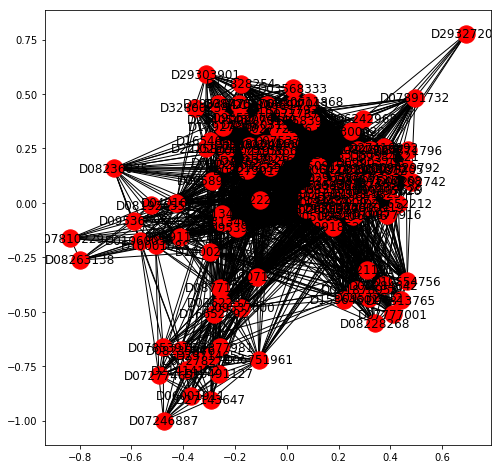

In [5]:
# Here you can visualize your import:
import matplotlib.pyplot as plot
# very important
%matplotlib inline 

plot.figure(figsize=(8,8)) 
net.draw_networkx(NWfromEdges)

In [6]:
# How many nodes:
len(NWfromEdges.nodes())

119

In [7]:
# How many edges:
len(NWfromEdges.edges())

3562

1.2 **Importing from Adjacency Matrix:**

The data below represents the people in the board of most important companies of Peru. The format tells you if they are in the same company board. It does not represent counts.
<img src="pics/matrix.png" width="900">

As you see, this is a matrix where 1 indicates two people are connected (both are part of a company board), and 0 otherwise. 

First, get the data:

In [8]:
# Getting the matrix (edges):
EdgesAsDF = pandas.read_csv('data/dataFigueroa.csv', index_col=0) # col 0 (first is index)

In [9]:
EdgesAsDF.shape # square?

(37, 38)

As we have more columns than rows, there might be some extra info in one of the columns. Let's see:

In [10]:
EdgesAsDF.columns[-1:-5:-1] # start:end:increment

Index(['Multinacional', 'Arias Davila', 'Cogorno', 'Ikeda'], dtype='object')

The adjacency matrix needs not to include the  column ("Multinacional") in the data frame:

In [11]:
varsToDrop=['Multinacional']
adjacency=EdgesAsDF.drop(varsToDrop,axis=1) 

To create the network, we first use the numeric values, then add the names to the nodes.

In [12]:
#These are the node names
nodeLabels=adjacency.index.tolist()

In [13]:
# let's save them
nodeLabels=list(adjacency)

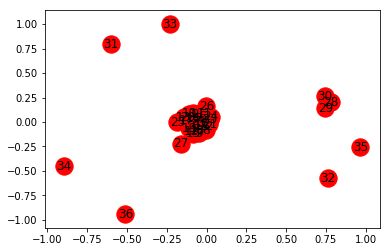

In [14]:
# now create the network
import matplotlib as mplot
NWfromMatrix = net.Graph(adjacency.values)  #adjacency.values has no names in the nodes
#mplot.Axes.clear()
net.draw_networkx(NWfromMatrix,with_labels=True)

Relabelling is easy, if we understand the node structure:

In [15]:
NWfromMatrix.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}, 31: {}, 32: {}, 33: {}, 34: {}, 35: {}, 36: {}})

The nodes are numbers. According to Networkx, we should use the function **relabel**. This function needs that you create a dictionary, where the **key is  the current node label**, and the **value is the new label**:
<br>
* <font color='blue'>**NWfromMatrix = net.relabel_nodes(NWfromMatrix, mapping)**</font>

Using the command above will make the network ready, but let's see how we get the "mapping".

In [16]:
# so we need a dict like this:
changingLabels={0:"John",1:"Tania"}
changingLabels

{0: 'John', 1: 'Tania'}

In [17]:
# we can NOT do this by hand!
# Let's think about an strategy:

oldNames=[0,1]
newNames=["John","Tania"]

In [18]:
#can I convert the above to a dict?
dict(zip(oldNames,newNames))

{0: 'John', 1: 'Tania'}

My mapping strategy of old-new names is clear now:

In [19]:
size=len(NWfromMatrix.nodes())
mapping=dict(zip(range(size), nodeLabels))

In [20]:
#take a look:
mapping

{0: 'Romero',
 1: 'Grana',
 2: 'Miro Quesada',
 3: 'Moreyra',
 4: 'Fort',
 5: 'De La Puente',
 6: 'Wiese',
 7: 'Onrubia',
 8: 'Brescia',
 9: 'Nicolini',
 10: 'Montero',
 11: 'Picaso',
 12: 'Bentin',
 13: 'Benavides',
 14: 'Bustamante',
 15: 'Woodman Pollit',
 16: 'Raffo',
 17: 'Piazza',
 18: 'Berckemeyer',
 19: 'Llosa Barber',
 20: 'Beoutis Ledesma',
 21: 'Rizo Patron',
 22: 'Montori',
 23: 'Sotomayor',
 24: 'Cilloniz',
 25: 'Ferreyros',
 26: 'Michell',
 27: 'Wong Lu',
 28: 'Batievsky Spack',
 29: 'Matos Escalada',
 30: 'Galsky',
 31: 'Lucioni',
 32: 'Rodriguez Rodriguez',
 33: 'Custer',
 34: 'Ikeda',
 35: 'Cogorno',
 36: 'Arias Davila'}

In [21]:
# Finally add labels to nodes (relabelling):
NWfromMatrix = net.relabel_nodes(NWfromMatrix, mapping)

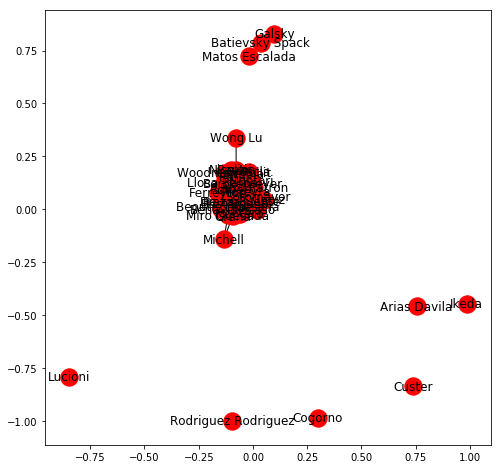

In [22]:
plot.figure(figsize=(8,8)) 
net.draw_networkx(NWfromMatrix,with_labels=True)

**1.3 Adjacency List**

Here is an adjacency list:
<img src="pics/adjacency.png" width="900">

In an adjacency list, only the fisrt value in a row is linked to the other ones in the same row. For example, the third row says that Eritrea has had conflicts with Ethiopia and Djibouti. It does not mean the conflict was with both of them at the same time, neither that Ethiopia had a conflict with Djibouti.

Importing is in simple steps:

In [62]:
#x=pd.read_table("https://github.com/escuela-alacip/introPython/raw/master/data/warsAdjList.csv")

fh=open("https://raw.githubusercontent.com/escuela-alacip/introPython/master/data/warsAdjList.csv", 'rb')

NWfromAdjList=net.read_adjlist(x.iloc[:,0],delimiter=",") # no pandas this time.
plot.figure(figsize=(8,8)) 
net.draw_networkx(NWfromAdjList)

OSError: [Errno 22] Invalid argument: 'https://raw.githubusercontent.com/escuela-alacip/introPython/master/data/warsAdjList.csv'

In [53]:
x=pd.read_table("https://github.com/escuela-alacip/introPython/raw/master/data/warsAdjList.csv")

In [61]:
x.iloc[:,0]

0     # from https://en.wikipedia.org/wiki/List_of_b...
1                                          Turkey,Syria
2                                      Bangladesh,India
3                             Eritrea,Ethiopia,Djibouti
4                                     Sudan,South Sudan
5                                        Lebanon,Israel
6                 Mongolia,Manchukuo,Japan,Soviet Union
7                                      Ethiopia,Somalia
8                                      Slovakia,Hungary
9                            Peru,Bolivia,Ecuador,Chile
10                                        Laos,Thailand
11                               Bolivia,Paraguay,Chile
12                                    Burkina Faso,Mali
13                         Manchukuo,Japan,Soviet Union
14                                            Iran,Iraq
15                                   Japan,Soviet Union
16                     China,Vietnam,India,Soviet Union
17                                    Thailand,C

## 2. Exploration <a id='part2'></a>

Using the data on Peruvian elites we were usign a while ago:
<img src="pics/elites.png" width="900">

I used this data previously, when importing the adjacency matrix. Now it is time to explore it.

### 2.0 A previous step

Remember we had an attribute we dropped, but now it is time to use it.

In [45]:
# The adjacency matrix did not include the nodes attributes.
EdgesAsDF['Multinacional'].head()

Names
Romero          1
Grana           1
Miro Quesada    1
Moreyra         1
Fort            1
Name: Multinacional, dtype: int64

So the network does not have that information:

In [46]:
NWfromMatrix.nodes(data=True)[:5]

TypeError: unhashable type: 'slice'

Networkx has the function **set_node_attributes** to take care of that, but needs that we prepare the attribute as a **mapping** using a dict, as we did before to relabel the nodes:
* We have the node values here: **EdgesAsDF.index**
* We have the attribute here: **EdgesAsDF['Multinacional']**

So, let's **zip** them into a dict!


In [47]:
dict(zip(EdgesAsDF.index,EdgesAsDF['Multinacional']))

{'Romero': 1,
 'Grana': 1,
 'Miro Quesada': 1,
 'Moreyra': 1,
 'Fort': 1,
 'De La Puente': 1,
 'Wiese': 1,
 'Onrubia': 1,
 'Brescia': 1,
 'Nicolini': 1,
 'Montero': 1,
 'Picaso': 1,
 'Bentin': 1,
 'Benavides': 1,
 'Bustamante': 1,
 'Woodman Pollit': 1,
 'Raffo': 1,
 'Piazza': 1,
 'Berckemeyer': 0,
 'Llosa Barber': 1,
 'Beoutis Ledesma': 1,
 'Rizo Patron': 1,
 'Montori': 1,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 0,
 'Michell': 0,
 'Wong Lu': 1,
 'Batievsky Spack': 1,
 'Matos Escalada': 1,
 'Galsky': 0,
 'Lucioni': 0,
 'Rodriguez Rodriguez': 1,
 'Custer': 0,
 'Ikeda': 0,
 'Cogorno': 0,
 'Arias Davila': 1}

As this procedure worked well, let's save it into an object:

In [48]:
EdgesAsDF['Names'] = EdgesAsDF.index

In [49]:
attributeToAdd=dict(zip(EdgesAsDF.index,EdgesAsDF['Multinacional']))

In [50]:
net.set_node_attributes(NWfromMatrix, 'Multinacional', attributeToAdd)

TypeError: unhashable type: 'dict'

It should have worked:

In [ ]:
NWfromMatrix.nodes(data=True)

Now we are ready to explore the network as a whole, its communities, and the nodes.

### 2. 1 Exploring the NETWORK

Is this network of businessmen **connected**?

If not connected, it means there are sub groups that do not interact with each other.

In [ ]:
net.is_connected(NWfromMatrix)

In [ ]:
net.number_connected_components(NWfromMatrix)

In [ ]:
# let's compute: net.connected_components(NWfromMatrix)
# and see those elements:

for c in net.connected_components(NWfromMatrix):
    print (c, '\n')

Visuals can help:

In [ ]:
import matplotlib.pyplot as plt

totalColors=net.number_connected_components(NWfromMatrix)

colorsSelected = plt.get_cmap('Paired',totalColors)

c = net.number_connected_components(NWfromMatrix)
pos=net.spring_layout(NWfromMatrix,k=0.1)
C = net.connected_component_subgraphs(NWfromMatrix)
i=0
plot.figure(figsize=(15,12)) 
for g in C: 
    net.draw_networkx(g,pos,node_color=colorsSelected(i))
    i+=1

As this context does not have ONE connected network but several components, we can pay attention to the Giant Component:

In [ ]:
NWfromMatrix_giant = max(net.connected_component_subgraphs(NWfromMatrix), key=len)

In [ ]:
#take a look:
net.draw_networkx(NWfromMatrix_giant)

**Knowing this network (Giant Component)**

In [ ]:
#number of nodes
len(NWfromMatrix_giant.nodes())

In [ ]:
#number of edges
len(NWfromMatrix_giant.edges())

In [ ]:
# Density: 
#from 0 to 1, where 1 makes it a 'complete' network: there is a link between every pair of nodes.
net.density(NWfromMatrix_giant) 

In [ ]:
# Clustering coefficient of a node is away to measure if my own connections are connected among them.
# The average clustering coefficiente tells you the average of those values.
net.average_clustering(NWfromMatrix_giant)

In [ ]:
# Shorter path (average)
# shows the average number of steps it takes to get from one node to another.

net.average_shortest_path_length(NWfromMatrix_giant)

* **Random networks** have *small shortest path* and *small clustering coefficient*...Is this the case?
* The high clustering coefficient would suggest a **small world**, as most nodes are not neighbors of one another, but most nodes can be reached from every other in few steps.

In [ ]:
# Transitivity

# How probable is that two business men with a common business friend, are also friends.
net.transitivity(NWfromMatrix_giant)

In [ ]:
# Assortativity (degree)
# A measure to see if nodes are connecting to other nodes similar in degree.  
# closer to 1 means higher assortativity, closer to -1 diassortativity; while 0 no assortitivity.
net.degree_assortativity_coefficient(NWfromMatrix_giant)

In [ ]:
# you can also compute assortativity using an attribute of interest.
net.attribute_assortativity_coefficient(NWfromMatrix_giant,'Multinacional')

More plotting:

In [ ]:
# coloring the nodes by attribute:
color_map = plt.get_cmap("cool")  # color palette
valuesForColors=[n[1]['Multinacional'] for n in NWfromMatrix_giant.nodes(data=True)]
net.draw_networkx(NWfromMatrix_giant,cmap=color_map,node_color=valuesForColors)

### 2.2 Exploration of network communities

A **clique** can be understood a community of nodes that are well connected.

In [ ]:
# How many cliques
net.graph_number_of_cliques(NWfromMatrix_giant)

In [ ]:
for c in net.enumerate_all_cliques(NWfromMatrix_giant):
    print (c)

In [ ]:
# the number of nodes in the biggeest cliques
max([len(c) for c in net.enumerate_all_cliques(NWfromMatrix_giant)])

In [ ]:
# which are:
[c for c in net.enumerate_all_cliques(NWfromMatrix_giant) if len(c) == 8]

In [51]:
# COMMUNITY DETECTION (set of nodes densely connected internally)

# based on: https://perso.uclouvain.be/vincent.blondel/research/louvain.html
# pip install python-louvain

import community 
parts = community.best_partition(NWfromMatrix_giant)
parts

ModuleNotFoundError: No module named 'community'

'parts' is a dictionary, so we can use it to add an attribute:

In [ ]:
net.set_node_attributes(NWfromMatrix_giant, 'community', parts)

In [ ]:
pos=net.spring_layout(NWfromMatrix, k=0.2) 

valuesForColors=[n[1]['community'] for n in NWfromMatrix_giant.nodes(data=True)]

plot.axis("off")
net.draw_networkx_nodes(NWfromMatrix_giant,pos,cmap = plt.get_cmap("cool"), node_color = valuesForColors, 
                  node_size = 50, with_labels = False)

# edges
net.draw_networkx_edges(NWfromMatrix_giant,pos,width=1.0,alpha=0.2)

### 2.3 Node level exploration

In [ ]:
#Central nodes: degree

from operator import itemgetter
NodeDegree=sorted(NWfromMatrix_giant.degree().items(), key=itemgetter(1),reverse=True)
NodeDegree[:5]

In [ ]:
# Ego network of Hub?
HubNode,HubDegree=NodeDegree[0]
HubEgonet=net.ego_graph(NWfromMatrix_giant,HubNode)
pos=net.spring_layout(HubEgonet)
net.draw_networkx(HubEgonet,pos,node_color='b',node_size=800,with_labels=True, alpha=0.5,node_shape='^')
net.draw_networkx_nodes(HubEgonet,pos,nodelist=[HubNode],node_size=2000,node_color='r')

In [ ]:
# minimum number of nodes that must be removed to disconnect the network?
net.node_connectivity(NWfromMatrix_giant)

In [ ]:
#who can break the network?
list(net.articulation_points(NWfromMatrix_giant))

In [ ]:
# Ego network of articulation node?
pos=net.spring_layout(NWfromMatrix_giant,k=0.5)
net.draw_networkx(NWfromMatrix_giant,pos,node_color='b',node_size=800,with_labels=True, alpha=0.5,node_shape='^')
net.draw_networkx_nodes(NWfromMatrix_giant,pos,nodelist=['Bentin'],node_size=2000,node_color='r')

In [ ]:
# Computing centrality measures:
degr=net.degree_centrality(NWfromMatrix_giant)  # based on connections count
clos=net.closeness_centrality(NWfromMatrix_giant) # "speed" to access the rest
betw=net.betweenness_centrality(NWfromMatrix_giant) # "control flow" among the network nodes
eige=net.eigenvector_centrality(NWfromMatrix_giant) # central nodes connected to central nodes (influential?)

In [ ]:
# measures into a data frame:
Centrality=[ [rich, degr[rich],clos[rich],betw[rich],eige[rich]] for rich in NWfromMatrix_giant]
headers=['Businessman','Degree','Closeness','Betweenness','Eigenvector']
DFCentrality=pandas.DataFrame(Centrality,columns=headers)

In [ ]:
DFCentrality.head()

Representing these nodes (step by step):

In [ ]:
plot.scatter(DFCentrality.Betweenness, DFCentrality.Closeness)

In [ ]:
# size of dot
plot.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14)

In [ ]:
plot.figure(figsize=(20,20)) # size of plot
plot.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14)

In [ ]:
# color of point
plot.figure(figsize=(20,20))
plot.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14,
c=DFCentrality.Eigenvector,cmap=plt.get_cmap('YlOrRd'))

In [ ]:

plot.figure(figsize=(20,20))
plot.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14,
c=DFCentrality.Eigenvector,cmap=plt.get_cmap('YlOrRd'))


# ANNOTATING DOTS:

for i in range(len(DFCentrality.index)):
    plot.annotate(DFCentrality['Businessman'][i], 
                  (DFCentrality['Betweenness'][i],DFCentrality['Closeness'][i]),
                  fontsize=18,color="orange")

In [ ]:
plot.figure(figsize=(20,20))
plot.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14,
c=DFCentrality.Eigenvector,cmap=plt.get_cmap('YlOrRd'))

for i in range(len(DFCentrality.index)):
    plot.annotate(DFCentrality['Businessman'][i], 
                  (DFCentrality['Betweenness'][i],DFCentrality['Closeness'][i]),
                  fontsize=18,color="orange")

# TITLES:

plot.title("scatterplot (size for degree of node, color for eigenvalue)")
plot.xlabel("betweenness")
plot.ylabel("closeness")

<a id='part3'></a>
## 3. Exporting the Network

In [ ]:
#net.write_graphml(NWfromMatrix, "data/ElitePeru.graphml",encoding='utf-8')
net.write_gexf(NWfromMatrix, "data/ElitePeru.gexf",encoding='utf-8')

In [ ]:
type(NWfromMatrix.nodes(data=True)[1][1]["Multinacional"])

In [ ]:
for i in range(len(NWfromMatrix.nodes(data=True))):
    NWfromMatrix.nodes(data=True)[i][1]["Multinacional"]=int(NWfromMatrix.nodes(data=True)[i][1]["Multinacional"])

In [ ]:
net.write_graphml(NWfromMatrix, "data/ElitePeru.graphml",encoding='utf-8')
net.write_gexf(NWfromMatrix, "data/ElitePeru.gexf",encoding='utf-8')

In [ ]:
NWfromMatrix.nodes(data=True)

Another alternative to export the network:

In [ ]:
import csv

# edges
with open('data/ElitePeru.csv', 'w') as fileEdgeList:
    wr = csv.writer(fileEdgeList , delimiter=',')
    row="from","to","weight"
    wr.writerow(row)
    for node1,node2,edgeDict in NWfromMatrix.edges(data=True):
        row=node1,node2,edgeDict['weight']
        wr.writerow(row)

In [ ]:
with open('data/ElitePeru_att.csv', 'w') as fileNodeAttributes:
    wr = csv.writer(fileNodeAttributes, delimiter=',')
    row='Empresario','Multinacional'
    wr.writerow(row)
    for node,nodeDict in NWfromMatrix.nodes(data=True):
        row=node,nodeDict['Multinacional']
        wr.writerow(row)

_____

**AUSPICIO**: 

* El desarrollo de estos contenidos ha sido posible gracias al grant del Berkeley Initiative for Transparency in the Social Sciences (BITSS) at the Center for Effective Global Action (CEGA) at the University of California, Berkeley


<center>
<img src="https://www.bitss.org/wp-content/uploads/2015/07/bitss-55a55026v1_site_icon.png" style="width: 200px;"/>
</center>

* Este curso cuenta con el auspicio de:


<center>
<img src="https://www.python.org/static/img/psf-logo@2x.png" style="width: 500px;"/>
</center>



**RECONOCIMIENTO**


EL Dr. Magallanes agradece a la Pontificia Universidad Católica del Perú, por su apoyo en la participación en la Escuela ALACIP.

<center>
<img src="https://dci.pucp.edu.pe/wp-content/uploads/2014/02/Logotipo_colores-290x145.jpg" style="width: 400px;"/>
</center>


El autor reconoce el apoyo que el eScience Institute de la Universidad de Washington le ha brindado desde el 2015 para desarrollar su investigación en Ciencia de Datos.

<center>
<img src="https://escience.washington.edu/wp-content/uploads/2015/10/eScience_Logo_HR.png" style="width: 500px;"/>
</center>

<br>
<br>